# Lecture 2.2

In [46]:
import pandas as pd
import numpy as np

In [47]:
# cars data from kaggle
# https://www.kaggle.com/datasets/CooperUnion/cardataset
cars = pd.read_csv("../../Datasets/cars/data.csv")

### Normalizing the Dataset

In [48]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


To easily view the data, it is recommendable to normalize them.\
Have a set of rules/format to make it easier to manipulate/observe these data.

In [49]:
cars.columns = cars.columns.str.lower().str.replace(' ', '_')

In [50]:
cars.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [51]:
# create a list of the indices (the list of columns)
columns_with_string_values = list(cars.dtypes[cars.dtypes == 'object'].index)

In [52]:
# loop through each column and perform string manipulation on the values
for col in columns_with_string_values:
    cars[col] = cars[col].str.lower().str.replace(' ', '_')

In [53]:
cars.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


We have to learn how to extract meaningful data from our dataset.

In [54]:
for col in cars.columns:
    print("Column: ", col)
    print("Type: ", cars[col].dtype)
    print(cars[col].unique()[:5])
    print("Number of unique items: ", cars[col].nunique())
    print()

Column:  make
Type:  object
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique items:  48

Column:  model
Type:  object
['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique items:  914

Column:  year
Type:  int64
[2011 2012 2013 1992 1993]
Number of unique items:  28

Column:  engine_fuel_type
Type:  object
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique items:  10

Column:  engine_hp
Type:  float64
[335. 300. 230. 320. 172.]
Number of unique items:  356

Column:  engine_cylinders
Type:  float64
[ 6.  4.  5.  8. 12.]
Number of unique items:  9

Column:  transmission_type
Type:  object
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique items:  5

Column:  driven_wheels
Type:  object
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique items:  4

Column:  number_of_doors
Type:  float64
[ 2

Note: the popularity column uses Twitter mentions as a basis. **Popularity** == Number of mentions

### Exploratory Data Analysis

In [55]:
# useful libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# this line your plot outputs appear and be stored within the notebook.
# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

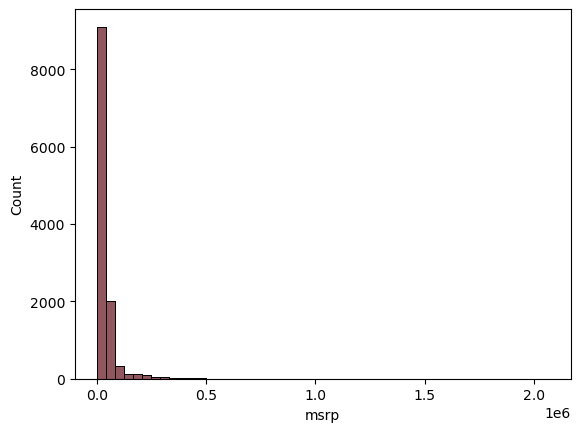

In [57]:
# bins = how many bars to show
sns.histplot(cars.msrp, bins=50)

# show graph
plt.show()

The distribution of the histogram above is called ***long tail distribution***

Now, let's try zooming in.

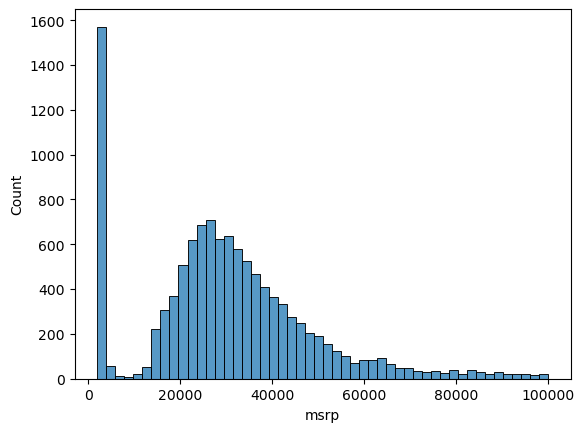

In [67]:
# bins = how many bars to show
sns.histplot(cars.msrp[cars.msrp < 1e5], bins=50)

# show graph
plt.show()

Tails like this dataset would often times confuse our model.\
To solve this, we have to figure out a way to remove the tail. One way to do it is to use logarithms.

In [68]:
np.log([1, 1e2, 1e4, 1e6])

array([ 0.        ,  4.60517019,  9.21034037, 13.81551056])

As seen from the result above, log allows us to close the gap. However, we might encounter some problems if there is a value of 0 in our data.\
This is because we cannot perform log(0).

In [69]:
np.log(0)

C:\Users\fanta\AppData\Local\Temp\ipykernel_5880\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

A straightforward way to fix this is to add 1 to every value.\
It is easy to do this with NumPy using ***.log1p()***

In [73]:
np.log1p([0, 1e2, 1e4, 1e6])

array([ 0.        ,  4.61512052,  9.21044037, 13.81551156])

Now, I'm going to try to graph it with what I've learned above.

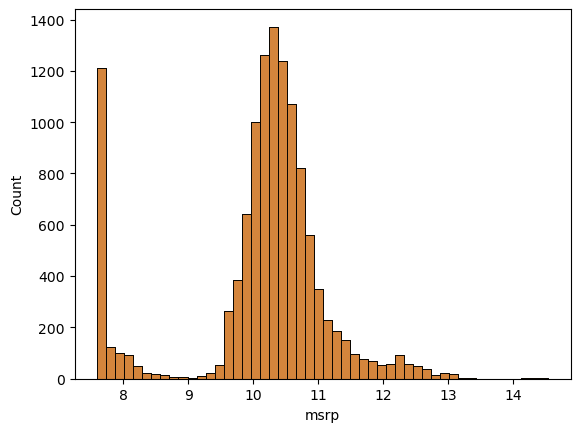

In [75]:
# bins = how many bars to show
# plot the cars.msrp with .log + 1
sns.histplot(np.log1p(cars.msrp), bins=50)
plt.show()

The long tail is now somehow gone!
I can now see a bell curve shape in the distribution. This is called **Normal Distribution**.\
Models excel with these types of data distribution!

### Missing Values

In [80]:
cars.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64